# In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices  of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

## Data Set Information:

### The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

## Attribute Information:

### 1. FullDate: Date in format yyyy-mm-dd  hh:mm:ss
### 2.ElecPrice: Prices of electricity charged in Kw per hour
### 3.Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T
### 4.SysLoad: Total Load on system or Power consumed at time-T 
### 3.Tmax: maximum temperature at time-T

## Questions :
### Question 1: Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?
### Question 2: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?
### Question 3: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?
### Question 4: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places? Hint: Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.
### Question 5: What is the RMSE in 2 decimal places?
### Question 6: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
### Question 7: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
### Question 8: What is the RMSE in 2 decimal places?
### Question 9: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?
### Question 10: Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?


## Our goal is to answer to these 10 questions


## First , let's load our librairies and then inspect our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df= pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv", encoding='ISO-8859-1')

In [3]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
df.shape

(92016, 5)

In [5]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


### Convert to a time series object - 'FullDate' to 'DateTime' 

In [9]:
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

### Rename the Columns FullDate And ElecPrice

In [10]:
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" }) 
df.set_index("ds", inplace=True, drop=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


## Let's answer our questions

### Question 1

#### Resampling

In [11]:
df_daily= df.resample('D').sum()

Text(0, 0.5, 'ElecPrice')

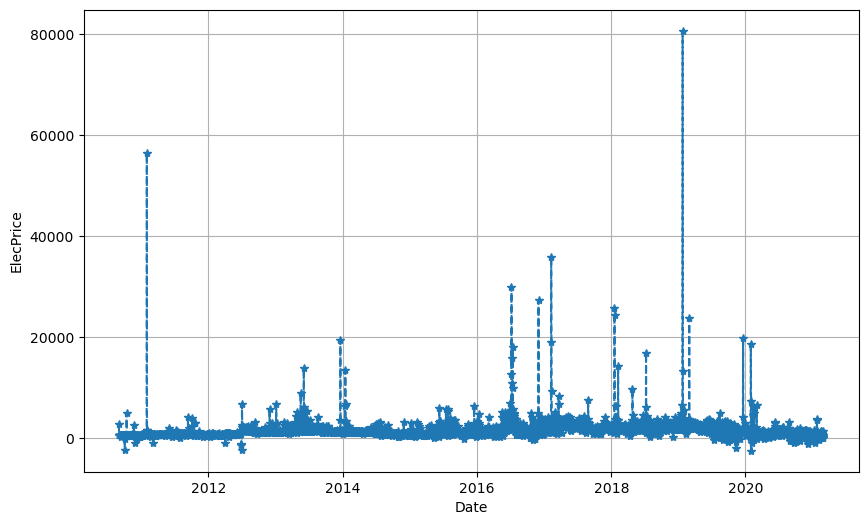

In [12]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Date' )
plt.ylabel( 'ElecPrice' )

### Question 2: 

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(df_daily['SysLoad'])

(-3.690158988836647,
 0.004253725504574104,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [15]:
adfuller(df_daily['GasPrice'])

(-2.9027666971651764,
 0.04502721288462583,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [16]:
print('SysLoad p-value:',np.round(adfuller(df_daily['SysLoad'])[1],decimals=6))
print('GasPrice p-value:',np.round(adfuller(df_daily['GasPrice'])[1],decimals=6)) 

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


### Question 3: 

In [17]:
print("GasPrice 5% critical:",np.round(adfuller(df_daily["GasPrice"])[4]["10%"],decimals=6)) 
print("ElecPrice 10% critical:",np.round(adfuller(df_daily['y'])[4]["5%"],decimals=6))

GasPrice 5% critical: -2.567174
ElecPrice 10% critical: -2.862298


### Question 4: 

In [18]:
df_daily.reset_index(inplace=True)

#### Train test split the model

In [19]:
train = df_daily.iloc[:2757,:]
test = df_daily.iloc[2757:,:]

In [20]:
train.shape

(2757, 5)

In [21]:
test.shape

(1077, 5)

In [22]:
test.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [23]:
train.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [24]:
from prophet import Prophet

In [25]:
model1 = Prophet()
model1.fit(train)

22:28:25 - cmdstanpy - INFO - Chain [1] start processing
22:28:26 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [27]:
pred1 = model1.predict(test)

In [28]:
MAPE = mape(test['y'],pred1['yhat'])
print("Prophet Model1 MAPE score on validation set is :{:.2f} ".format(MAPE))

Prophet Model1 MAPE score on validation set is :544.46 


### Question 5

In [29]:
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [30]:
RMSE = rmse(test['y'], pred1['yhat'])
print("Prophet Model1 RMSE score on validation set is : {:.2f} ".format(RMSE))

Prophet Model1 RMSE score on validation set is : 3207.77 


### Question 6

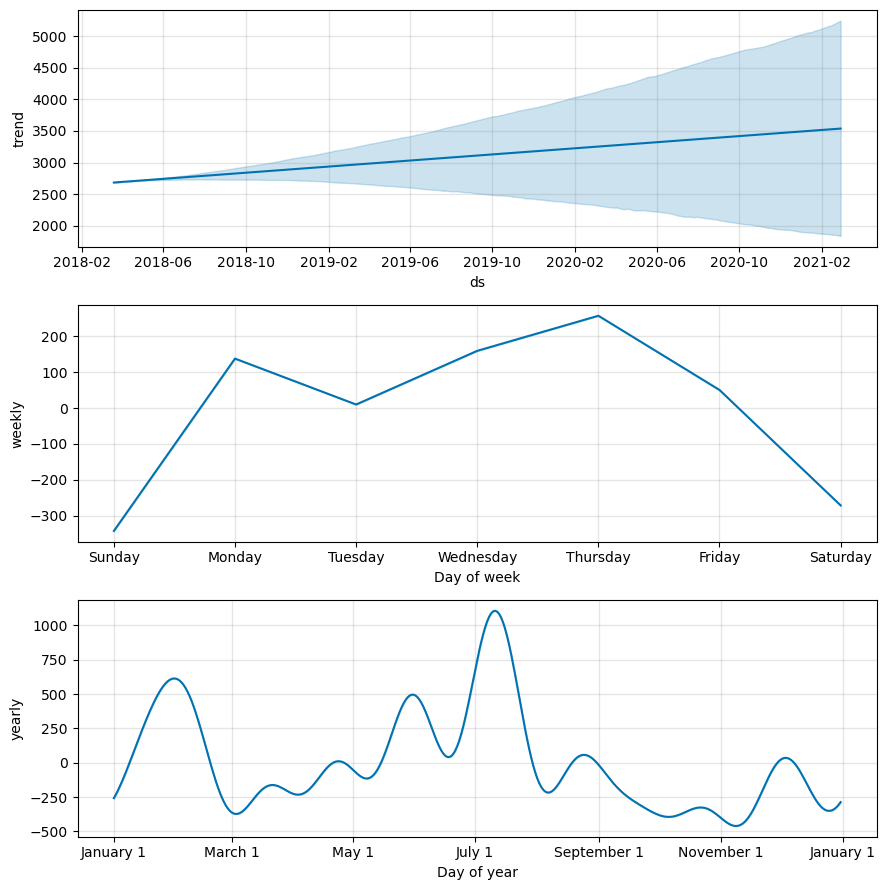

In [32]:
model1.plot_components(pred1) 
plt.show()

### Question 7

In [33]:
dff = df_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
dff.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [34]:
train2 = dff[:2757]
test2 = dff[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [35]:
model2 = Prophet()
model2.add_regressor("add1")
model2.add_regressor("add2")
model2.add_regressor("add3")
model2.fit(train2)

22:29:15 - cmdstanpy - INFO - Chain [1] start processing
22:29:16 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
pred2 = model2.predict(test2) 

In [37]:
MAPE= mape(test['y'],pred2['yhat'])
print("Prophet Model2 MAPE score on validation set is :{:.2f} ".format(MAPE))

Prophet Model2 MAPE score on validation set is :232.67 


### Question 8

In [38]:
RMSE = rmse(test['y'], pred2['yhat'])
print("Prophet Model1 RMSE score on validation set is : {:.2f} ".format(RMSE))

Prophet Model1 RMSE score on validation set is : 2708.43 


### Question 9

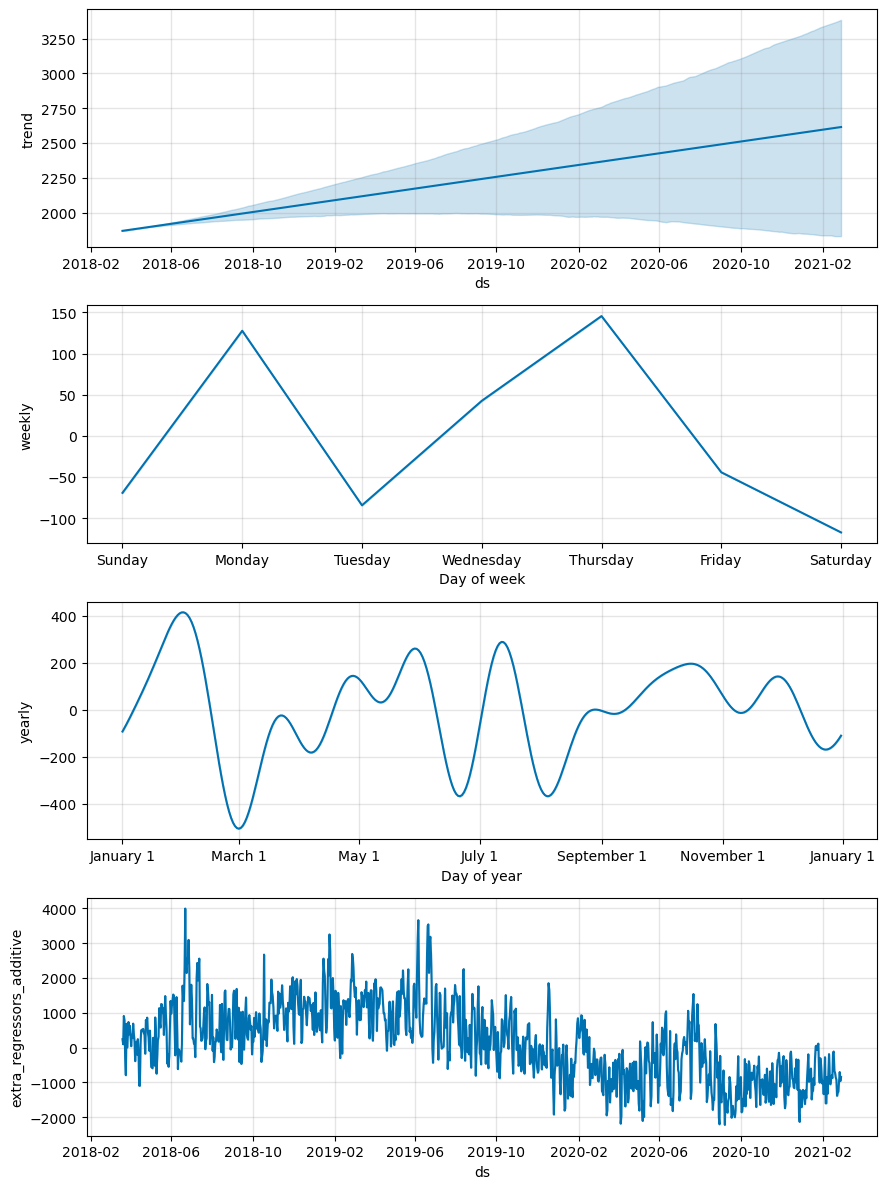

In [39]:
model2.plot_components(pred2) 
plt.show()

### Question 10

In [40]:
train3 = dff.iloc[:2757,:]
test3 = dff.iloc[2757:,:]

In [41]:
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add3')

In [42]:
model3.fit(train3)

22:29:30 - cmdstanpy - INFO - Chain [1] start processing
22:29:31 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
pred3 = model3.predict(test3) 

In [44]:
MAPE= mape(test['y'],pred3['yhat'])
print("Prophet Model3 MAPE score on validation set is :{:.2f} ".format(MAPE))

Prophet Model3 MAPE score on validation set is :232.81 
